# Prediction - Erik

## Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Initial Data Processing

In [13]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('../data/topic_year_counts.csv')
data.rename(columns={'Unnamed: 0': 'topic'}, inplace=True)
print(len(data))
data.head(5)

9895


,topic,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Insect Robotics,122.0,35.0,40.0,48.0,64.0,121.0,188.0,208.0,280.0,505.0,704.0,1013.0,1327.0,1716.0,2006.0,2320.0,2863.0,4435.0,1580.0
1,Labor Economics,39.0,7.0,14.0,12.0,17.0,25.0,40.0,38.0,37.0,41.0,36.0,61.0,61.0,65.0,76.0,63.0,72.0,150.0,56.0
2,Cultural Heritage Informatics,151.0,34.0,83.0,65.0,77.0,125.0,150.0,178.0,214.0,267.0,286.0,316.0,351.0,473.0,607.0,635.0,896.0,1546.0,629.0
3,Virtual Teaching,71.0,14.0,34.0,38.0,20.0,43.0,69.0,86.0,105.0,127.0,129.0,201.0,228.0,304.0,477.0,456.0,681.0,1324.0,441.0
4,Author Profiling,342.0,125.0,218.0,227.0,284.0,523.0,657.0,728.0,872.0,1092.0,1216.0,1517.0,1575.0,2024.0,2438.0,2309.0,2937.0,5208.0,1817.0


In [10]:
sorted_data = data.sort_values(by='2024', ascending=False)
sorted_data.head(5)

,topic,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
5357,Few-Shot Learning,1719.0,524.0,914.0,1041.0,1338.0,2435.0,3102.0,3376.0,5210.0,7147.0,8871.0,12003.0,15975.0,20869.0,24825.0,27439.0,35859.0,58882.0,20483.0
1105,One-Shot Learning,1574.0,463.0,827.0,956.0,1198.0,2256.0,2868.0,3102.0,4818.0,6589.0,8238.0,11259.0,15029.0,19681.0,23459.0,26048.0,34067.0,55629.0,19500.0
9650,Domain Adaptation and Few-Shot Learning,1645.0,487.0,832.0,962.0,1204.0,2238.0,2822.0,3129.0,4861.0,6730.0,8374.0,11404.0,15208.0,19792.0,23623.0,26008.0,33789.0,54974.0,19050.0
3330,Zero-Shot Learning,1544.0,459.0,800.0,938.0,1181.0,2194.0,2780.0,3023.0,4677.0,6451.0,7939.0,10793.0,14409.0,18698.0,22394.0,24624.0,32482.0,53474.0,18806.0
5202,Zero-shot Learning,1544.0,459.0,800.0,938.0,1181.0,2194.0,2780.0,3023.0,4677.0,6451.0,7939.0,10793.0,14409.0,18698.0,22394.0,24624.0,32482.0,53474.0,18806.0


In [14]:
data['topic'] = data['topic'].str.lower()
data = data.drop_duplicates(subset='topic')
print(len(data))
data.head(5)

9863


,topic,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,insect robotics,122.0,35.0,40.0,48.0,64.0,121.0,188.0,208.0,280.0,505.0,704.0,1013.0,1327.0,1716.0,2006.0,2320.0,2863.0,4435.0,1580.0
1,labor economics,39.0,7.0,14.0,12.0,17.0,25.0,40.0,38.0,37.0,41.0,36.0,61.0,61.0,65.0,76.0,63.0,72.0,150.0,56.0
2,cultural heritage informatics,151.0,34.0,83.0,65.0,77.0,125.0,150.0,178.0,214.0,267.0,286.0,316.0,351.0,473.0,607.0,635.0,896.0,1546.0,629.0
3,virtual teaching,71.0,14.0,34.0,38.0,20.0,43.0,69.0,86.0,105.0,127.0,129.0,201.0,228.0,304.0,477.0,456.0,681.0,1324.0,441.0
4,author profiling,342.0,125.0,218.0,227.0,284.0,523.0,657.0,728.0,872.0,1092.0,1216.0,1517.0,1575.0,2024.0,2438.0,2309.0,2937.0,5208.0,1817.0


In [15]:
# Split the data into train, validation, and test sets
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)  # 80% train, 20% temp
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)  # 10% val, 10% test

# Save the datasets to CSV files
train_data.to_csv('../data/train_data.csv', index=False)
val_data.to_csv('../data/val_data.csv', index=False)
test_data.to_csv('../data/test_data.csv', index=False)

## Load Data

In [26]:
train_data = pd.read_csv('../data/train_data_new.csv')
val_data = pd.read_csv('../data/val_data_new.csv')
test_data = pd.read_csv('../data/test_data_new.csv')

# Combine all three datasets into a full_data dataframe
full_data = pd.concat([train_data, val_data, test_data], ignore_index=True)

print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)
print("Full data shape:", full_data.shape)

Train data shape: (7921, 20)
Validation data shape: (987, 20)
Test data shape: (987, 20)
Full data shape: (9895, 20)


In [27]:
sorted_data = full_data.sort_values(by='2015', ascending=False)
sorted_data.head(5)

,topic,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
7393,np-hardness,4247.0,1567.0,2383.0,2799.0,3395.0,4885.0,6607.0,6831.0,9682.0,11424.0,11399.0,13286.0,15462.0,18834.0,20617.0,20982.0,26235.0,40670.0,14613.0
3391,large-scale graphs,4190.0,1492.0,2293.0,2678.0,3269.0,4726.0,6324.0,6689.0,9473.0,11156.0,11556.0,13718.0,16318.0,20054.0,22155.0,22707.0,28621.0,45069.0,16060.0
2626,np-complete problems,3987.0,1449.0,2201.0,2583.0,3163.0,4578.0,6221.0,6401.0,9007.0,10615.0,10713.0,12473.0,14573.0,17561.0,19238.0,19545.0,24129.0,36427.0,12987.0
8829,np-completeness,3984.0,1384.0,2138.0,2502.0,3051.0,4478.0,6145.0,6346.0,8955.0,10447.0,10907.0,12933.0,15317.0,18928.0,20973.0,21636.0,27528.0,43366.0,15597.0
8444,deterministic near-linear time algorithms,3850.0,1446.0,2206.0,2571.0,3160.0,4489.0,5902.0,6178.0,8875.0,10396.0,10201.0,11753.0,13568.0,16094.0,17372.0,17310.0,21251.0,31693.0,11331.0


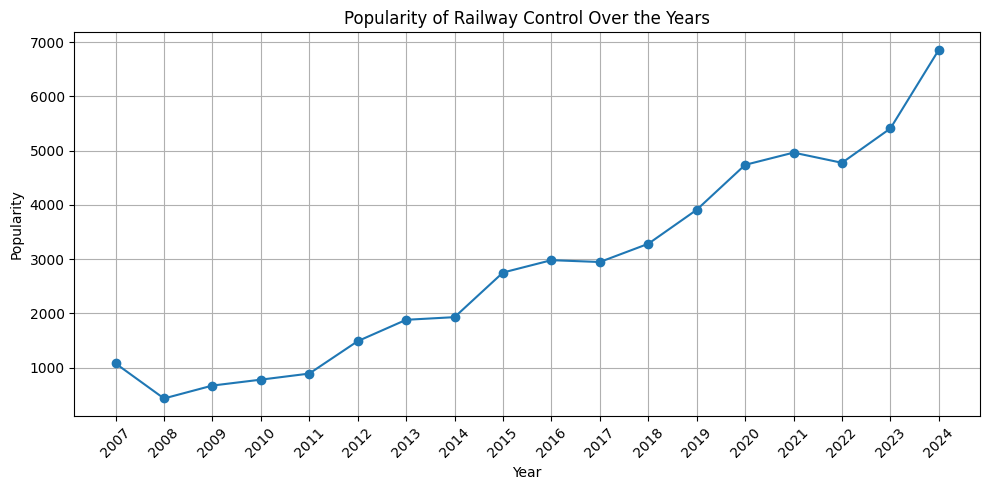

In [31]:
import matplotlib.pyplot as plt

# Filter the data for the topic "railway control"
data = full_data[full_data['topic'] == 'variational inequalities']

# Check if the filtered data is empty
if data.empty:
    print("No data available for the topic.")
else:
    # Set the years as the x-axis
    years = [str(year) for year in range(2007, 2025)]

    # Plot the data
    plt.figure(figsize=(10, 5))
    plt.plot(years, data.loc[:, '2007':'2024'].values.flatten(), marker='o')
    plt.title('Popularity of Railway Control Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


## Data Analysis

/tmp/ipykernel_3157306/2083814386.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_data[year].dropna() for year in years], labels=years)  # Drop NaN values for the box plot


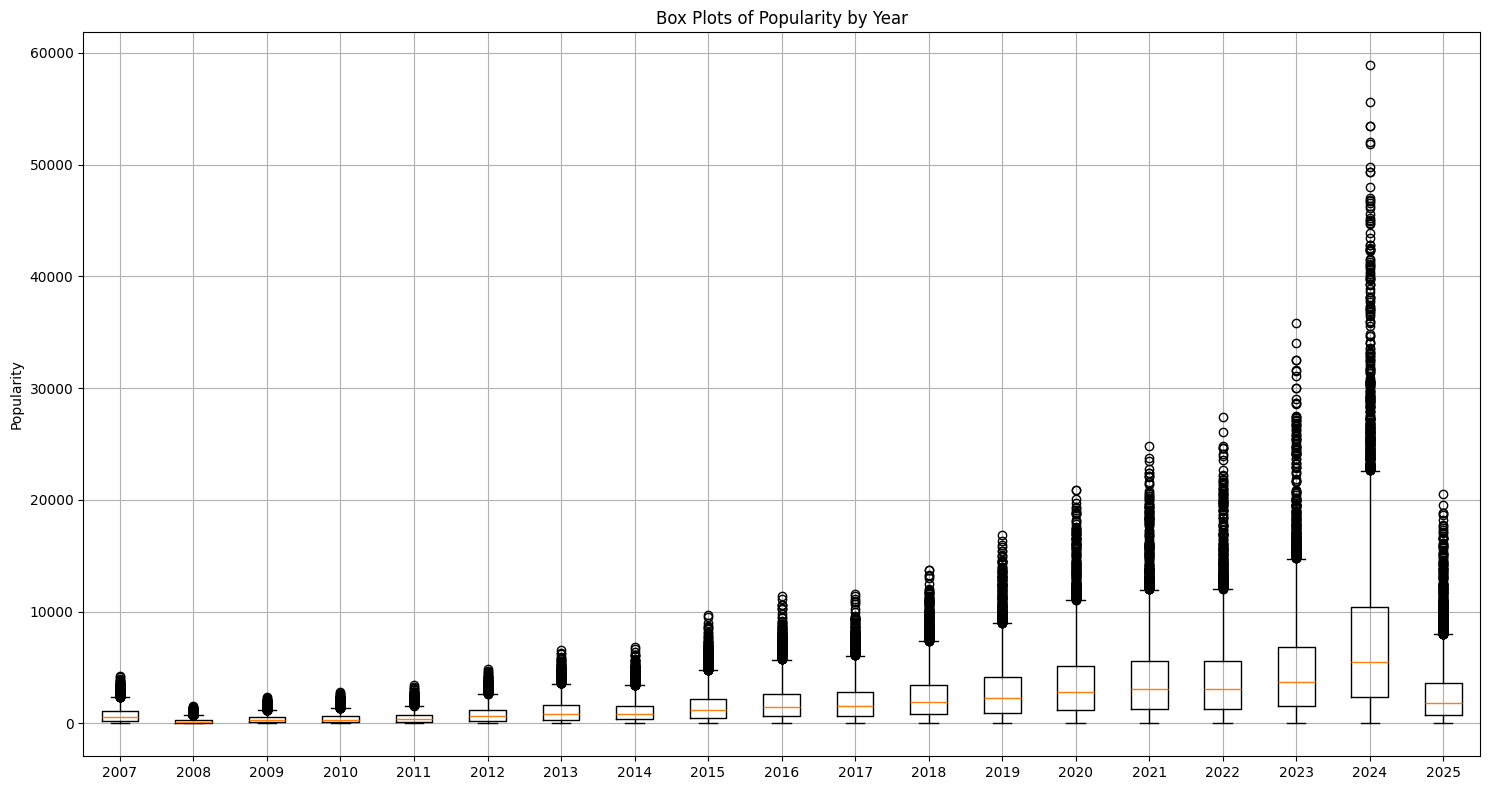

In [10]:
# Create box plots for each year in a single plot
years = [str(year) for year in range(2007, 2026)]
plt.figure(figsize=(15, 8))

plt.boxplot([train_data[year].dropna() for year in years], labels=years)  # Drop NaN values for the box plot
plt.title('Box Plots of Popularity by Year')
plt.ylabel('Popularity')
plt.grid()

plt.tight_layout()
plt.show()


In [19]:
max_min = pd.DataFrame()
max_min['topic'] = train_data['topic']
max_min['min_popularity'] = train_data.loc[:, '2007':'2024'].replace(0, np.nan).min(axis=1)  # Find least popularity that's not 0
max_min['max_popularity'] = train_data.loc[:, '2007':'2024'].max(axis=1)
max_min['max_div_min'] = max_min['max_popularity'] / max_min['min_popularity']
max_min = max_min.sort_values(by='max_div_min', ascending=False)  # Sort by max_div_min descending
max_min.head(5)

,topic,min_popularity,max_popularity,max_div_min
607,deep learning for ads,2.0,9172.0,4586.000000
5684,point cloud deep learning,2.0,7400.0,3700.000000
5159,deep learning debugging,3.0,10112.0,3370.666667
7307,innovation in deep learning,1.0,3202.0,3202.000000
5852,deep learning frameworks,4.0,12325.0,3081.250000


In [22]:
# Apply log1p transformation
log1p_data = np.log1p(train_data.loc[:, '2007':'2024'])

# Min-max scaling to [0, 1] by row
min_max_scaled_data = log1p_data.sub(log1p_data.min(axis=1), axis=0).div(log1p_data.max(axis=1) - log1p_data.min(axis=1), axis=0)

# Create a new DataFrame with the scaled data, keeping the topic column
scaled_train_data = train_data.copy()
scaled_train_data.loc[:, '2007':'2024'] = min_max_scaled_data
scaled_train_data.head(5)

,topic,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,cross-site scripting,0.346897,0.0,0.142993,0.176603,0.218591,0.348946,0.415978,0.429280,0.493258,0.534128,0.549558,0.601768,0.646089,0.716315,0.755113,0.757195,0.853183,1.0,7690.0
1,runtime management,0.380360,0.0,0.149529,0.213292,0.248234,0.365320,0.425764,0.454382,0.511860,0.575455,0.587689,0.646393,0.697064,0.757077,0.780107,0.774641,0.821807,1.0,1569.0
2,communication,0.438375,0.0,0.187655,0.201704,0.230901,0.407483,0.529090,0.499936,0.584413,0.639215,0.612762,0.675538,0.729195,0.792242,0.808311,0.812295,0.857240,1.0,1280.0
3,inference time optimization,0.323801,0.0,0.150207,0.177189,0.251039,0.400509,0.479178,0.450706,0.534308,0.572248,0.599706,0.648070,0.712925,0.772678,0.803764,0.809367,0.870648,1.0,6382.0
4,jpeg2000,0.341175,0.0,0.136868,0.180724,0.218450,0.344386,0.421975,0.448127,0.551880,0.614656,0.629168,0.676568,0.720633,0.774434,0.799321,0.797811,0.856267,1.0,4443.0


In [23]:
train_data.head(5)

,topic,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,cross-site scripting,1826.0,501.0,854.0,968.0,1132.0,1840.0,2362.0,2482.0,3150.0,3668.0,3885.0,4719.0,5566.0,7230.0,8354.0,8419.0,12037.0,20796.0,7690.0
1,runtime management,461.0,126.0,210.0,261.0,294.0,438.0,538.0,593.0,721.0,895.0,933.0,1139.0,1353.0,1659.0,1794.0,1761.0,2067.0,3786.0,1569.0
2,communication,694.0,192.0,333.0,347.0,378.0,634.0,905.0,831.0,1064.0,1249.0,1156.0,1389.0,1625.0,1954.0,2048.0,2072.0,2363.0,3587.0,1280.0
3,inference time optimization,1401.0,429.0,743.0,820.0,1074.0,1854.0,2471.0,2227.0,3022.0,3471.0,3837.0,4578.0,5801.0,7215.0,8082.0,8249.0,10317.0,16543.0,6382.0
4,jpeg2000,1087.0,307.0,510.0,600.0,690.0,1100.0,1466.0,1615.0,2371.0,2991.0,3156.0,3761.0,4427.0,5402.0,5923.0,5890.0,7312.0,12444.0,4443.0


## Model

What we really want the model to do is to predict future popularity on unseen topics. Also, we don't have groundtruth for the future popularity of even known topics. 

I formulate the problem as the following:

Given popularity data on a set of topics before year 2022, train a model to predict the popularity of these topics in 2022, 2023, and 2024. The model would be trained on groundtruth popularity of year 2019, 2020, and 2021 since these are the only available data. 

or Given popularity data on a set of known topics for years till 2024, train the model to predict the popularity of unseen topics in 2022, 2023, and 2024. The model would be trained on groundtruth popularity of known topics in 2022, 2023, and 2024. However, this goal is not useful because we can always get the popularity of these topics from a vectorDB search. 